<a href="https://colab.research.google.com/github/MiguelAngeloTr/Datathon/blob/main/PM/Mamografia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
!pip install pydicom

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import filters
import pydicom
from pydicom.dataset import Dataset, FileDataset
import datetime
import tempfile
import os
import imageio
import seaborn as sns

In [131]:
!wget https://raw.githubusercontent.com/MiguelAngeloTr/Datathon/refs/heads/main/PM/data_Tipo_Tejido_adjusted.csv


--2025-05-14 15:28:24--  https://raw.githubusercontent.com/MiguelAngeloTr/Datathon/refs/heads/main/PM/data_Tipo_Tejido_adjusted.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4380782 (4.2M) [text/plain]
Saving to: ‘data_Tipo_Tejido_adjusted.csv.3’

data_Tipo_Tejido_ad 100%[===================>]   4.18M  --.-KB/s    in 0.09s   

2025-05-14 15:28:24 (48.5 MB/s) - ‘data_Tipo_Tejido_adjusted.csv.3’ saved [4380782/4380782]



In [132]:
file_dir = "data_Tipo_Tejido_adjusted.csv"
df = pd.read_csv(file_dir)
df.shape

(2372, 106)

In [133]:
import pandas as pd

pd.set_option('display.max_columns', None)  # ← Muestra todas las columnas
pd.set_option('display.expand_frame_repr', False)  # Evita salto de línea

# Leer y mostrar DataFrame
file_dir = "data_Tipo_Tejido_adjusted.csv"
df = pd.read_csv(file_dir)

print(list(df.columns))  # Te da todas las columnas como una lista completa

['diagnostics_Image-original_Mean', 'diagnostics_Image-original_Maximum', 'original_shape2D_Elongation', 'original_shape2D_MajorAxisLength', 'original_shape2D_MaximumDiameter', 'original_shape2D_MeshSurface', 'original_shape2D_MinorAxisLength', 'original_shape2D_Perimeter', 'original_shape2D_PerimeterSurfaceRatio', 'original_shape2D_PixelSurface', 'original_shape2D_Sphericity', 'original_firstorder_10Percentile', 'original_firstorder_90Percentile', 'original_firstorder_Energy', 'original_firstorder_Entropy', 'original_firstorder_InterquartileRange', 'original_firstorder_Kurtosis', 'original_firstorder_Maximum', 'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Mean', 'original_firstorder_Median', 'original_firstorder_Minimum', 'original_firstorder_Range', 'original_firstorder_RobustMeanAbsoluteDeviation', 'original_firstorder_RootMeanSquared', 'original_firstorder_Skewness', 'original_firstorder_TotalEnergy', 'original_firstorder_Uniformity', 'original_firstorder_Varian

In [134]:
df['Tipo_Tejido'].value_counts()

,count
Tipo_Tejido,
B,1308
C,645
A,235
D,184


In [135]:
df['Mammography_Equipment'].value_counts()

,count
Mammography_Equipment,
SIEMENS_Mammomat Inspiration,1939
SIEMENS_MAMMOMAT Revelation,433


In [136]:
df.describe()


,diagnostics_Image-original_Mean,diagnostics_Image-original_Maximum,original_shape2D_Elongation,original_shape2D_MajorAxisLength,original_shape2D_MaximumDiameter,original_shape2D_MeshSurface,original_shape2D_MinorAxisLength,original_shape2D_Perimeter,original_shape2D_PerimeterSurfaceRatio,original_shape2D_PixelSurface,original_shape2D_Sphericity,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
count,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2.372000e+03,2372.000000,2372.000000,2372.000000,2.372000e+03,2372.000000,2372.00000,2372.000000,2.372000e+03,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2.372000e+03,2372.000000,2.372000e+03,2372.000000,2.372000e+03,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.

In [137]:
numeric_df = df.iloc[:,0:-2]
numeric_df.corr()

,diagnostics_Image-original_Mean,diagnostics_Image-original_Maximum,original_shape2D_Elongation,original_shape2D_MajorAxisLength,original_shape2D_MaximumDiameter,original_shape2D_MeshSurface,original_shape2D_MinorAxisLength,original_shape2D_Perimeter,original_shape2D_PerimeterSurfaceRatio,original_shape2D_PixelSurface,original_shape2D_Sphericity,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
diagnostics_Image-original_Mean,1.000000,-0.024121,0.783292,0.819982,0.641400,0.953962,0.941675,0.846067,-0.838494,0.953962,0.507401,0.188223,-0.196207,0.933053,-0.324916,-0.292047,0.253959,0.000584,-0.276923,-0.076170,-0.046851,0.043580,-0.001614,-0.276585,-0.142104,-0.060679,0.933053,0.316455,-0.241994,-0.129504,-0.150383,-0.097761,-0.240845,0.004248,-0.244120,-0.033414,-0.102211,-0.004459,0.079027,0.086556,0.012353,0.056036,0.184859,-0.243630,0.107961,-0.082440,0.208526,-0.254632,-0.030831,-0.247432,-0.082440,-0.325472,-0.240421,0.834643,0.316413,

<Axes: >

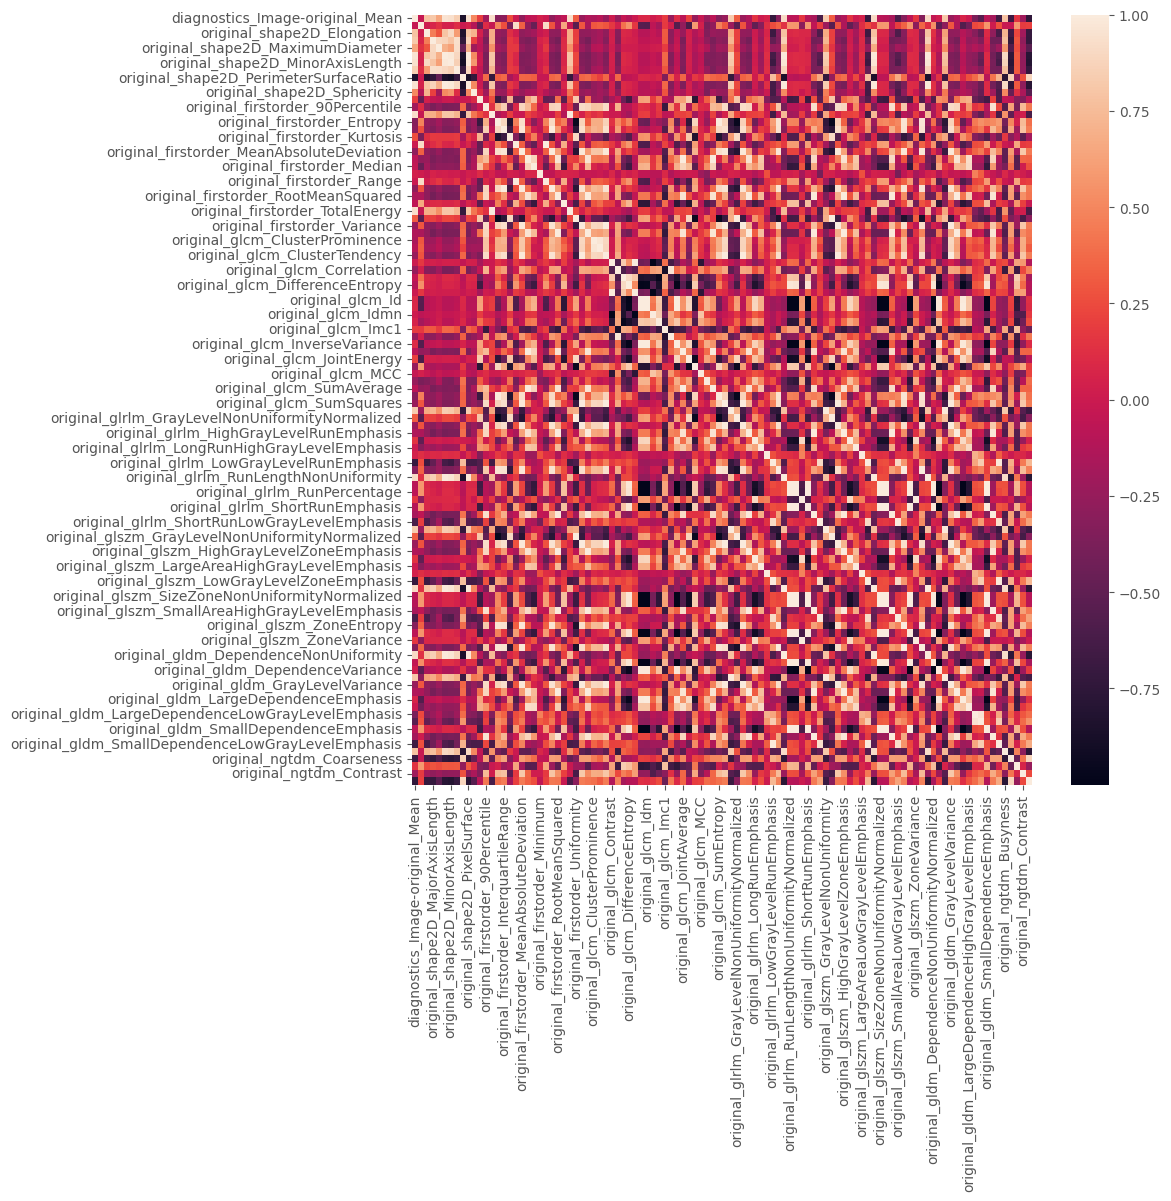

In [138]:
plt.figure(figsize=(10,10))
df_corr = df[numeric_df.columns].corr()
# display_full(df_corr)
sns.heatmap(df_corr)
# plt.title(f'Corr', fontsize=12, fontweight="bold", x=0.6, y=1.02)

In [139]:
corr_matrix = numeric_df.corr().abs()

# Quitar duplicados simétricos y autocomparaciones
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Convertir a series y ordenar
sorted_pairs = upper_triangle.unstack().dropna().sort_values(ascending=False)

print(sorted_pairs)
print(f"Número de pares únicos (sin duplicados ni diagonal): {len(sorted_pairs)}")

original_firstorder_TotalEnergy                original_firstorder_Energy                    1.000000
original_glszm_GrayLevelNonUniformity          original_glrlm_GrayLevelNonUniformity         1.000000
original_glszm_SizeZoneNonUniformity           original_glrlm_RunLengthNonUniformity         1.000000
original_glszm_LowGrayLevelZoneEmphasis        original_glrlm_LowGrayLevelRunEmphasis        1.000000
original_glszm_LargeAreaLowGrayLevelEmphasis   original_glrlm_LongRunLowGrayLevelEmphasis    1.000000
                                                                                               ...   
original_glrlm_LongRunHighGrayLevelEmphasis    diagnostics_Image-original_Mean               0.000259
original_glszm_LargeAreaHighGrayLevelEmphasis  diagnostics_Image-original_Mean               0.000259
original_ngtdm_Busyness                        original_firstorder_Maximum                   0.000195
original_gldm_LowGrayLevelEmphasis             original_glrlm_HighGrayLevelRunEmph

In [140]:
umbral = 0.95
sorted_pairs[sorted_pairs>umbral]

,,0
original_firstorder_TotalEnergy,original_firstorder_Energy,1.000000
original_glszm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformity,1.000000
original_glszm_SizeZoneNonUniformity,original_glrlm_RunLengthNonUniformity,1.000000
original_glszm_LowGrayLevelZoneEmphasis,original_glrlm_LowGrayLevelRunEmphasis,1.000000
original_glszm_LargeAreaLowGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,1.000000
...,...,...
original_firstorder_Uniformity,original_firstorder_Entropy,0.952742
original_glszm_ZoneEntropy,original_firstorder_InterquartileRange,0.951881
original_glrlm_RunEntropy,original_firstorder_InterquartileRange,0.951881
original_glrlm_HighGrayLevelRunEmphasis,original_firstorder_Mean,0.951864


In [141]:
# 1. Extraer solo los pares redundantes
redundant_pairs = sorted_pairs[sorted_pairs > umbral]

# 2. Contar cuántas veces aparece cada feature en esos pares
from collections import Counter

# Cada índice es una tupla: (feature1, feature2)
features_flat = [feature for pair in redundant_pairs.index for feature in pair]

# Contar ocurrencias
feature_counts = Counter(features_flat)

# 3. Mostrar los features más redundantes
most_redundant = feature_counts.most_common(25)  # Top 10
print(f"🔁 Top features with most redundant correlations (ρ > {umbral}):")
for feature, count in most_redundant:
    print(f"{feature}: {count} times")

🔁 Top features with most redundant correlations (ρ > 0.95):
original_glszm_SmallAreaEmphasis: 13 times
original_glrlm_ShortRunEmphasis: 13 times
original_glszm_ZonePercentage: 13 times
original_glrlm_RunPercentage: 13 times
original_glszm_SizeZoneNonUniformityNormalized: 13 times
original_glrlm_RunLengthNonUniformityNormalized: 13 times
original_gldm_LargeDependenceEmphasis: 13 times
original_gldm_SmallDependenceEmphasis: 13 times
original_glcm_Idm: 13 times
original_glcm_Id: 13 times
original_glcm_InverseVariance: 13 times
original_gldm_DependenceNonUniformityNormalized: 13 times
original_gldm_DependenceVariance: 12 times
original_glcm_DifferenceEntropy: 12 times
original_firstorder_RobustMeanAbsoluteDeviation: 11 times
original_firstorder_MeanAbsoluteDeviation: 11 times
original_glszm_HighGrayLevelZoneEmphasis: 10 times
original_glrlm_HighGrayLevelRunEmphasis: 10 times
original_gldm_HighGrayLevelEmphasis: 10 times
original_glcm_Autocorrelation: 10 times
original_firstorder_RootMeanSq

<Axes: >

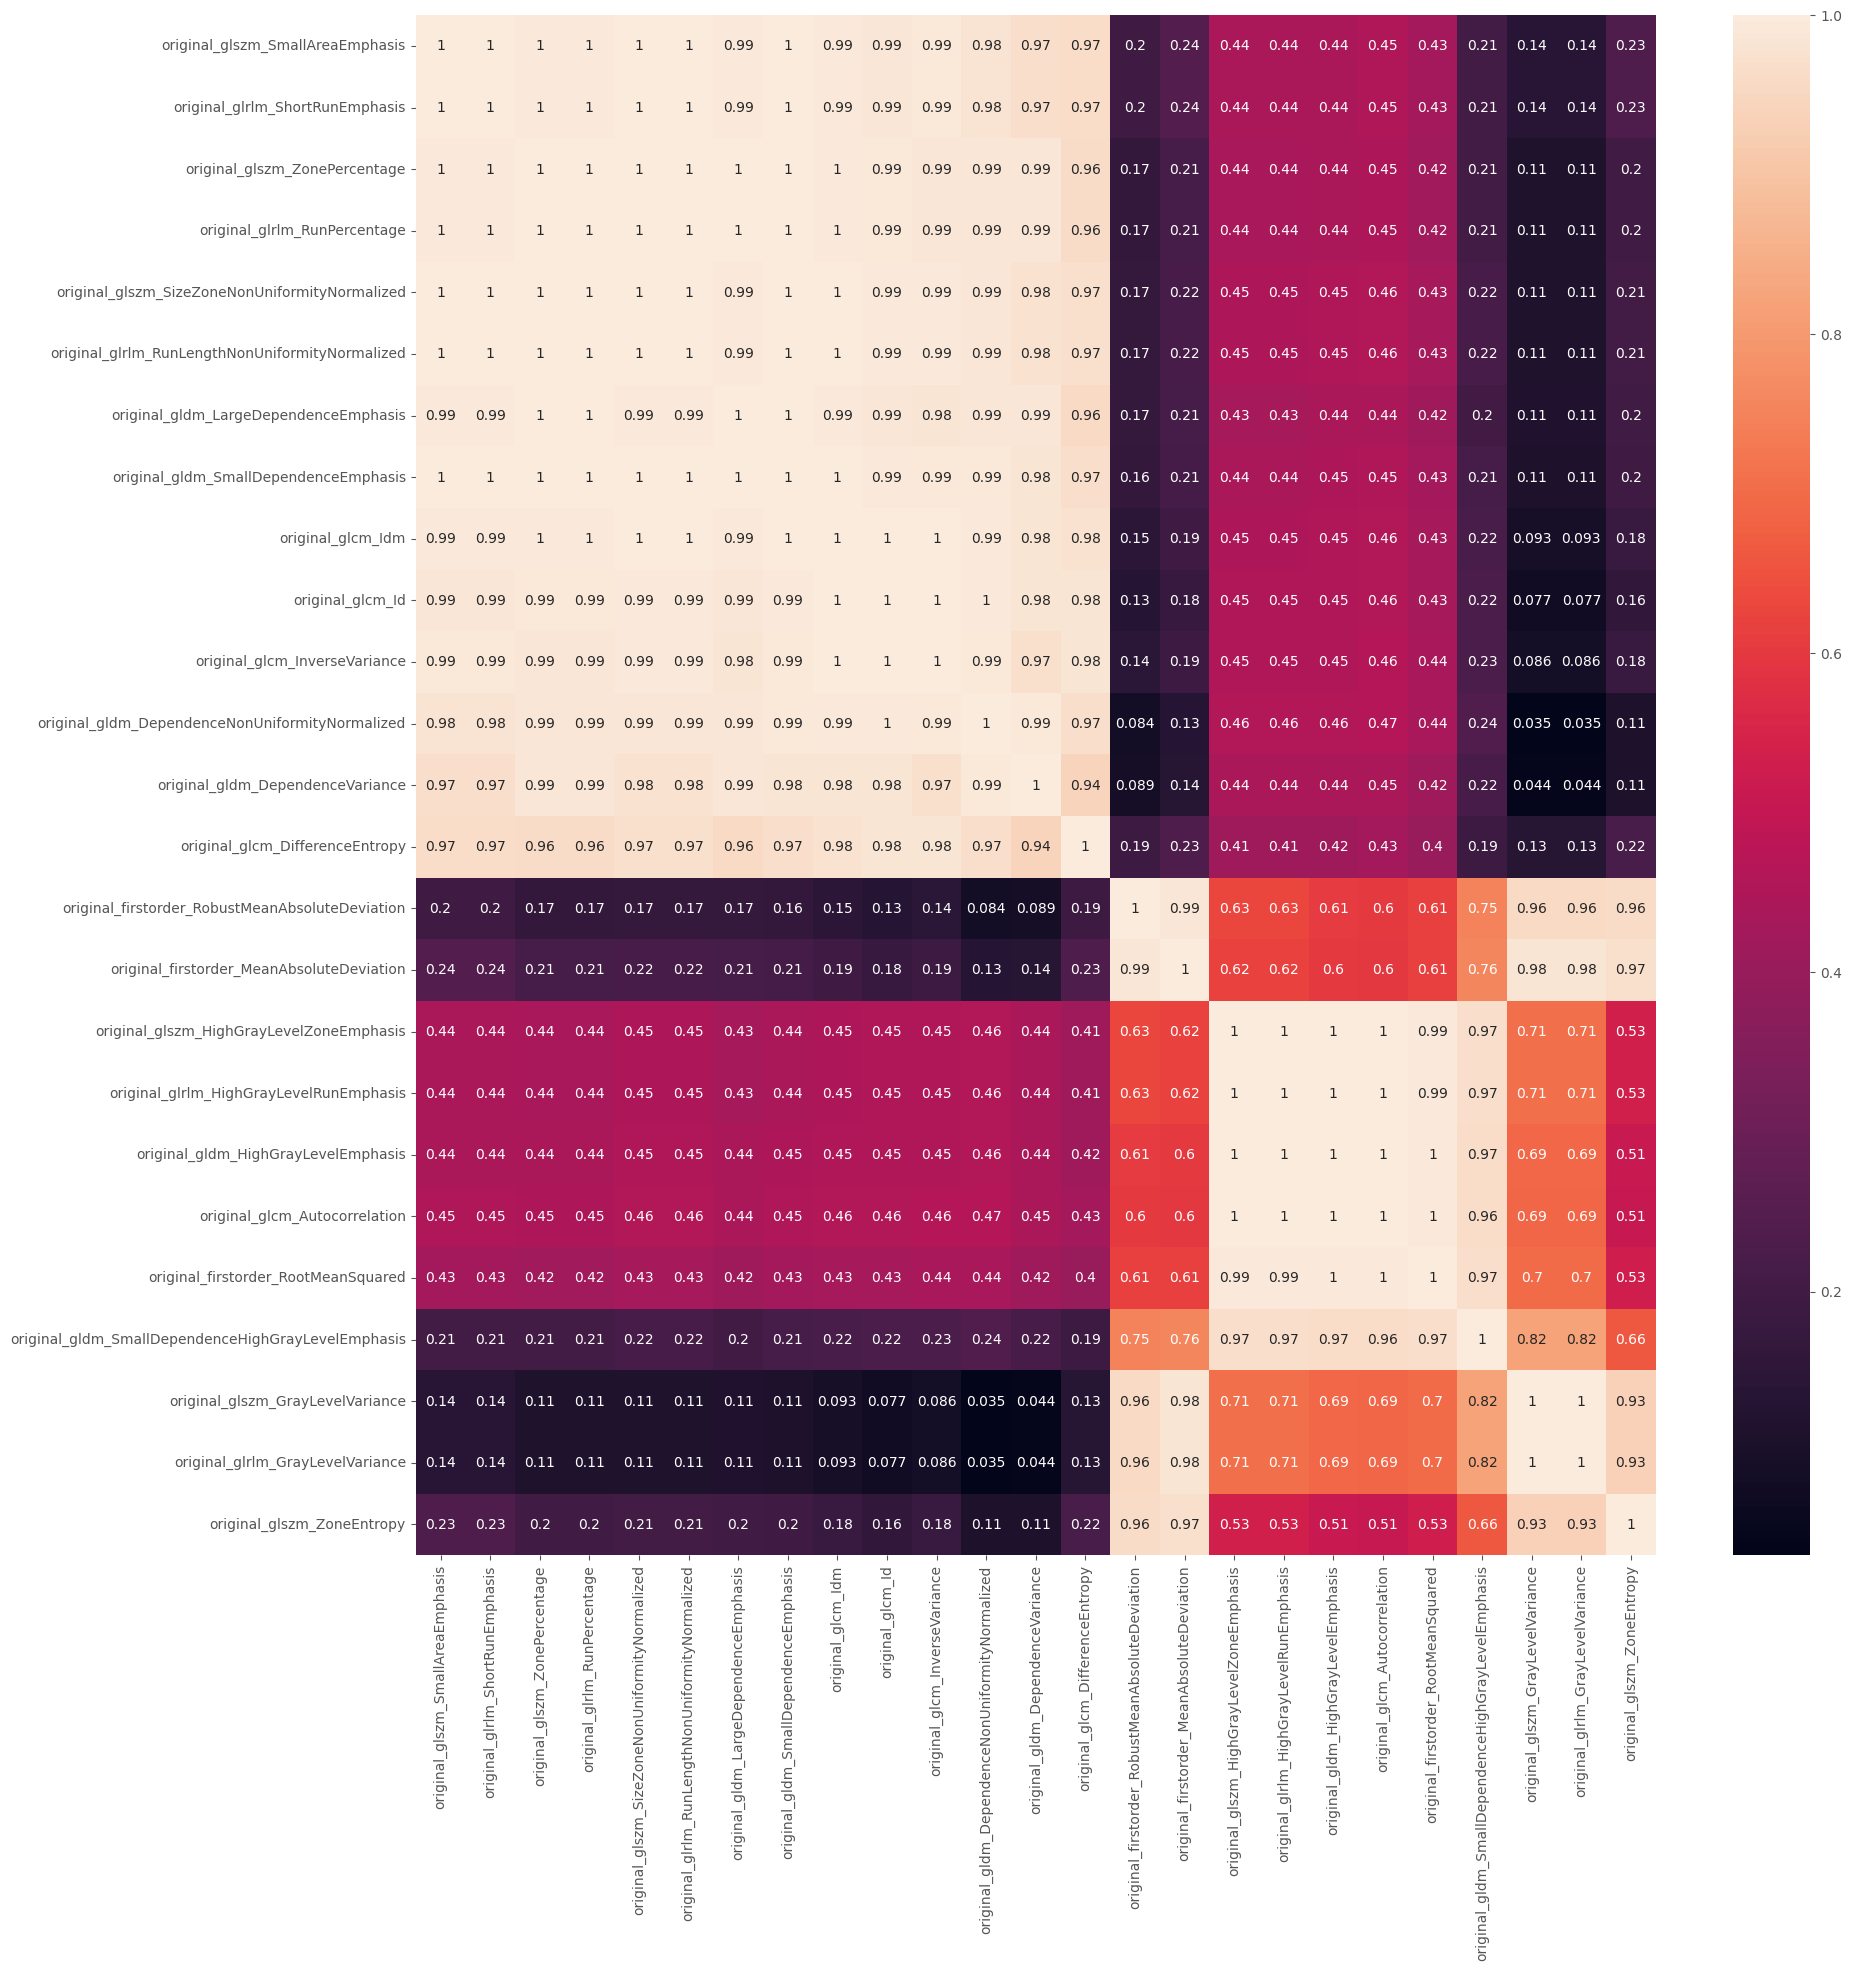

In [142]:
most_redundant_cols = []
for i in range (len(most_redundant)):
    most_redundant_cols.append(most_redundant[i][0])
plt.figure(figsize=(20,20))
sns.heatmap(df[most_redundant_cols].corr().abs(), annot=True)

In [143]:
print(df.isnull().sum().sum())

0


In [144]:
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(f"Cantidad de filas duplicadas: {num_duplicados}")

Cantidad de filas duplicadas: 0


In [145]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import multiprocessing
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [146]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
numeric_df.mean(axis=0)

----------------------
Media de cada variable
----------------------


,0
diagnostics_Image-original_Mean,236.155057
diagnostics_Image-original_Maximum,3942.024030
original_shape2D_Elongation,0.526241
original_shape2D_MajorAxisLength,2326.223959
original_shape2D_MaximumDiameter,2567.077394
...,...
original_ngtdm_Busyness,14.235222
original_ngtdm_Coarseness,0.000011
original_ngtdm_Complexity,42930.424968
original_ngtdm_Contrast,0.117765


In [147]:
print('----------------------')
print('Varianza de cada variable')
print('----------------------')
numeric_df.var(axis=0)

----------------------
Varianza de cada variable
----------------------


,0
diagnostics_Image-original_Mean,6.330211e+03
diagnostics_Image-original_Maximum,4.422804e+04
original_shape2D_Elongation,7.578529e-03
original_shape2D_MajorAxisLength,7.886480e+04
original_shape2D_MaximumDiameter,1.270023e+05
...,...
original_ngtdm_Busyness,4.950306e+01
original_ngtdm_Coarseness,4.582052e-11
original_ngtdm_Complexity,1.014464e+08
original_ngtdm_Contrast,2.335906e-03


Comprobación balanceo

In [148]:
import pandas as pd

y= df['Tipo_Tejido']

# Seleccionar variables numéricas
X = df.select_dtypes(include='float64')
# Conteo de muestras por clase
class_distribution = pd.Series(y).value_counts()

# Proporción
imbalance_ratio = class_distribution.max() / class_distribution.min()
print("Distribución de clases:\n", class_distribution)
print("\nRatio de desbalanceo:", imbalance_ratio)

Distribución de clases:
 Tipo_Tejido
B    1308
C     645
A     235
D     184
Name: count, dtype: int64

Ratio de desbalanceo: 7.108695652173913


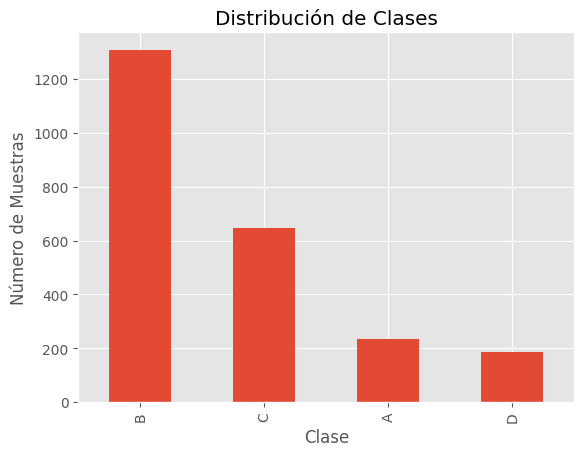

In [104]:
import matplotlib.pyplot as plt
class_distribution.plot(kind='bar')
plt.title("Distribución de Clases")
plt.xlabel("Clase")
plt.ylabel("Número de Muestras")
plt.show()

SMOTE Balanceo

In [105]:
from imblearn.over_sampling import SMOTE

# Objetivo: Llevar A, C y D al tamaño de C (645 muestras)
sampling_strategy = {'A': 645, 'D': 645}  # C ya tiene 645
smote = SMOTE(sampling_strategy=sampling_strategy)
X_balanced, y_balanced = smote.fit_resample(X, y)


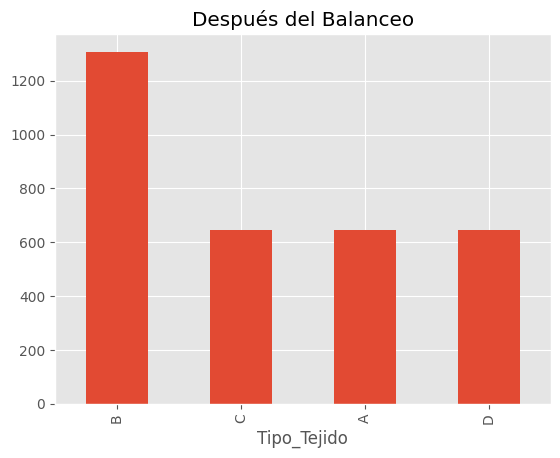

In [106]:
# Después del balanceo
pd.Series(y_balanced).value_counts().plot(kind='bar', title='Después del Balanceo')
plt.show()

PCA

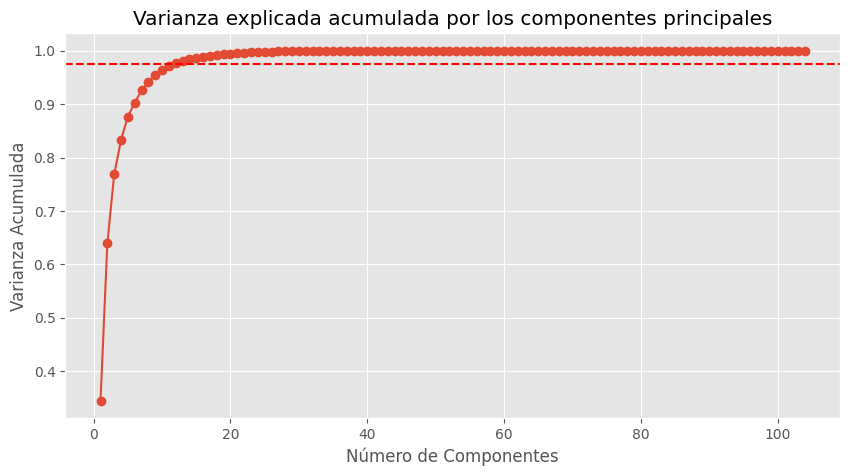

Componentes seleccionados: 12


In [112]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np  # Importar numpy para usar np.cumsum

# 2. Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_balanced)  # ¿Es "X_scaled" o "X_scaled"? (typo en "scaled")

# 3. Ajustar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 4. Varianza explicada acumulada
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_),
         marker='o')
plt.axhline(y=0.975, color='r', linestyle='--')
plt.title('Varianza explicada acumulada por los componentes principales')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.grid(True)
plt.show()

# PCA que conserva el 97.5% de la varianza
pca = PCA(n_components=0.975)
X_reduced = pca.fit_transform(X_scaled)  # Asegúrate de que sea "X_scaled" y no "X_scaled"

# Cuántos componentes se conservaron
print("Componentes seleccionados:", pca.n_components_)

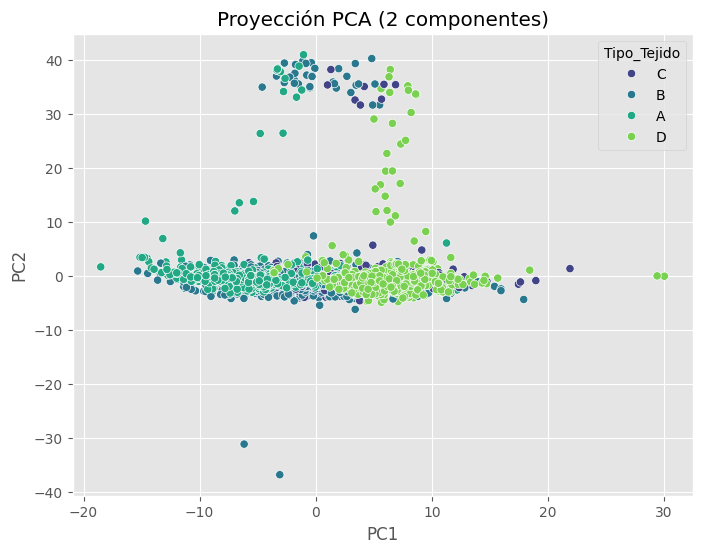

In [116]:
# Convertimos los primeros dos componentes en un DataFrame
df_pca = pd.DataFrame(X_reduced[:, :2], columns=['PC1', 'PC2'])
df_pca['Tipo_Tejido'] = y_balanced.values


# Visualización 2D
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Tipo_Tejido', palette='viridis')
plt.title('Proyección PCA (2 componentes)')
plt.show()


**Random Forest Classifier**

In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, recall_score

# Codificar después de SMOTE
le = LabelEncoder()
y_encoded = le.fit_transform(y_balanced)


# ----------------------------------------------------------
# 2. División en entrenamiento y prueba (usando X_reduced del PCA)
# ----------------------------------------------------------
# Nota: Usamos X_reduced (PCA con 97.5% varianza)
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced,
    y_encoded,
    train_size=0.7,
    random_state=42,
    stratify=y_encoded
)

# ----------------------------------------------------------
# 3. Entrenamiento con Random Forest
# ----------------------------------------------------------
modelo = RandomForestClassifier(
    random_state=42,
    class_weight='balanced'  # Opcional: corrige desbalanceo de clases
)
modelo.fit(X_train, y_train)

# ----------------------------------------------------------
# 4. Predicciones y evaluación
# ----------------------------------------------------------
y_pred = modelo.predict(X_test)

# Métricas
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))

# Reporte completo con nombres de clases originales
print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred,
    target_names=le.classes_  # Muestra nombres originales de las clases
))
print("Forma de X_reduced:", X_reduced.shape)





Accuracy: 0.7872559095580678
Recall (macro): 0.7752958248894344

Classification Report:
              precision    recall  f1-score   support

           A       0.82      0.80      0.81       193
           B       0.76      0.83      0.80       392
           C       0.73      0.55      0.63       194
           D       0.85      0.92      0.88       194

    accuracy                           0.79       973
   macro avg       0.79      0.78      0.78       973
weighted avg       0.78      0.79      0.78       973

Forma de X_reduced: (3243, 12)


In [125]:

!pip install pyradiomics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 31.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Discarding https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz (from https://pypi.org/simple/pyradiomics/): Requested pyradiomics from https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz has inconsistent version: expected '3.1.0', but metadata has '3.0.1a1'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 50.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7

In [159]:
# Clonar el repositorio de GitHub
!git clone https://github.com/MiguelAngeloTr/Datathon.git
!rm -rf Datathon
!git clone https://github.com/MiguelAngeloTr/Datathon.git Datathon


fatal: destination path 'Datathon' already exists and is not an empty directory.
Cloning into 'Datathon'...
remote: Enumerating objects: 129, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 129 (delta 95), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (129/129), 17.41 MiB | 7.39 MiB/s, done.
Resolving deltas: 100% (95/95), done.


Extracción de carácteristicas

In [172]:
import os

# Cambia la ruta según la carpeta donde estén los DICOMs
dicom_dir = 'Datathon/PM/Imagenes/'  # Ajusta esta ruta a la tuya

# Listar los archivos .dcm
dicom_files = [f for f in os.listdir(dicom_dir) if f.endswith('.dcm')]
print(f"{len(dicom_files)} archivos DICOM encontrados:")
print(dicom_files[:5])  # Muestra los primeros 5



3 archivos DICOM encontrados:
['p1.MG._.2.6.2025.05.12.12.06.55.394.46957873.dcm', 'p3.MG._.3.12.2025.05.12.12.07.49.35.44876646.dcm', 'p2.MG._.6.12.2025.05.12.12.07.28.430.18212933.dcm']


Se encontraron 3 archivos DICOM.

--- Archivo: p1.MG._.2.6.2025.05.12.12.06.55.394.46957873.dcm ---
Paciente: p1
Modalidad: MG
Dimensiones: 3528 x 2682


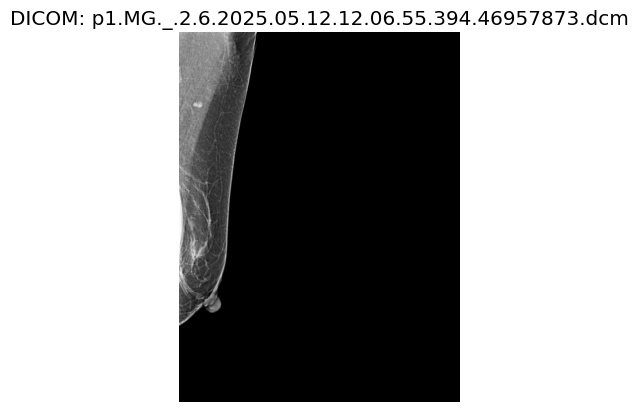


--- Archivo: p3.MG._.3.12.2025.05.12.12.07.49.35.44876646.dcm ---
Paciente: p3
Modalidad: MG
Dimensiones: 3584 x 2816


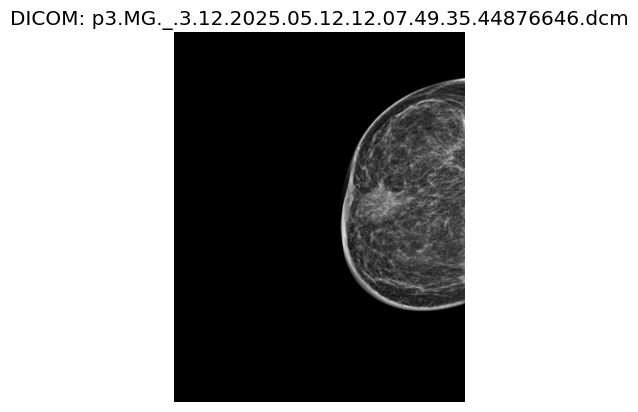


--- Archivo: p2.MG._.6.12.2025.05.12.12.07.28.430.18212933.dcm ---
Paciente: p2
Modalidad: MG
Dimensiones: 3584 x 2816


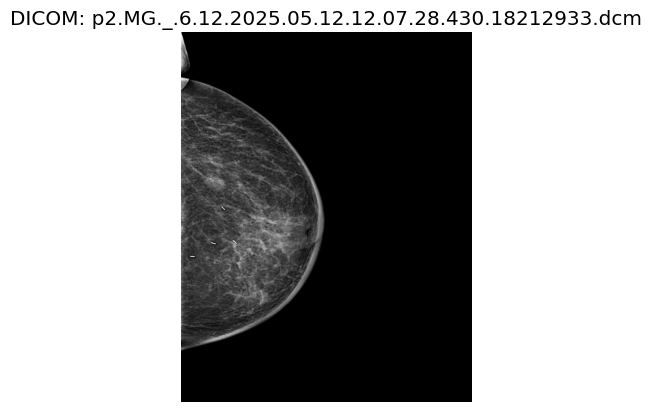

In [176]:
import pydicom
import matplotlib.pyplot as plt

dicom_files = [f for f in os.listdir(dicom_dir) if f.endswith('.dcm')]  # Filtra archivos .dcm

# Verifica si hay archivos DICOM
if not dicom_files:
    print("No se encontraron archivos DICOM (.dcm) en el directorio.")
else:
    print(f"Se encontraron {len(dicom_files)} archivos DICOM.")

# Recorre cada archivo DICOM y lo muestra
for dicom_file in dicom_files:
    try:
        # Construye la ruta completa y carga el archivo
        dicom_path = os.path.join(dicom_dir, dicom_file)
        ds = pydicom.dcmread(dicom_path)

        # Muestra información básica
        print("\n--- Archivo:", dicom_file, "---")
        print("Paciente:", ds.get("PatientID", "No disponible"))
        print("Modalidad:", ds.get("Modality", "No disponible"))
        print("Dimensiones:", ds.Rows, "x", ds.Columns)

        # Muestra la imagen
        plt.imshow(ds.pixel_array, cmap='gray')
        plt.title(f"DICOM: {dicom_file}")
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"Error al procesar {dicom_file}: {str(e)}")


In [174]:
import SimpleITK as sitk
import os

def convertir_dicom_a_nifti(carpeta_dicom, carpeta_salida):
    if not os.path.exists(carpeta_salida):
        os.makedirs(carpeta_salida)

    for subcarpeta in os.listdir(carpeta_dicom):
        ruta_sub = os.path.join(carpeta_dicom, subcarpeta)
        if os.path.isdir(ruta_sub):
            reader = sitk.ImageSeriesReader()
            series_ids = reader.GetGDCMSeriesIDs(ruta_sub)
            if series_ids:
                series_files = reader.GetGDCMSeriesFileNames(ruta_sub, series_ids[0])
                reader.SetFileNames(series_files)
                imagen = reader.Execute()

                nombre_salida = os.path.join(carpeta_salida, subcarpeta + ".nii.gz")
                sitk.WriteImage(imagen, nombre_salida)
                print(f"✅ Convertido: {nombre_salida}")
            else:
                print(f" No se encontraron series DICOM en {ruta_sub}")
convertir_dicom_a_nifti("Datathon/PM/Imagenes", "salida_nifti")

